In [1]:
from SEBlock import SE_Block
import torch.nn.functional as F
from torch import nn
import torch
from torch.optim import Adam
import torchvision
import math
from loading_dataset import load_imagenette
from model_learning import Training_valid_testing_model
from EfficientBlock import EfficientNet

In [2]:
train_loader, val_loader, test_loader, test_dataset = load_imagenette()

In [3]:
%load_ext autoreload
%env CUDA_VISIBLE_DEVICES = '3'

env: CUDA_VISIBLE_DEVICES='3'


In [4]:
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

In [5]:
# b0 version by default, but it can be changed by varying width_factor and depth_factor
model = EfficientNet()
model = model.to(device)
num_epochs = 40
learning_rate = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(params=model.parameters(), lr=learning_rate)

In [6]:
# In pytorch - EfficientNet B0 parameters: 5288548
print('parameters:', sum(param.numel() for param in model.parameters()))

parameters: 4020358


In [7]:
learning = Training_valid_testing_model(model=model, loss_function=loss_function,
                                        optimizer=optimizer, num_epochs=num_epochs, train_loader=train_loader,
                                        val_loader=val_loader, test_loader=test_loader, test_dataset=test_dataset,
                                        device=device)

In [8]:
learning.launch_epochs_calculations()

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch number is 1


  2%|▎         | 1/40 [03:34<2:19:08, 214.07s/it]

CrossEntropyLoss train 2.0226807115045755
CrossEntropyLoss validation 1.887166448629619
Validation accuracy: 35.07692307692308
Epoch number is 2


  5%|▌         | 2/40 [07:21<2:20:29, 221.84s/it]

CrossEntropyLoss train 1.748463138333849
CrossEntropyLoss validation 1.5801085787392706
Validation accuracy: 44.957264957264954
Epoch number is 3


  8%|▊         | 3/40 [11:03<2:16:47, 221.83s/it]

CrossEntropyLoss train 1.6128668610912722
CrossEntropyLoss validation 1.4285263933770644
Validation accuracy: 51.65811965811966
Epoch number is 4


 10%|█         | 4/40 [14:54<2:15:14, 225.41s/it]

CrossEntropyLoss train 1.4479216639254544
CrossEntropyLoss validation 1.3061871623080936
Validation accuracy: 57.53846153846154
Epoch number is 5


 12%|█▎        | 5/40 [18:35<2:10:40, 224.02s/it]

CrossEntropyLoss train 1.3085368662267118
CrossEntropyLoss validation 1.1487795831075782
Validation accuracy: 61.2991452991453
Epoch number is 6


 15%|█▌        | 6/40 [22:24<2:07:53, 225.68s/it]

CrossEntropyLoss train 1.194979288288065
CrossEntropyLoss validation 1.1064881172662224
Validation accuracy: 63.52136752136752
Epoch number is 7


 18%|█▊        | 7/40 [26:11<2:04:21, 226.11s/it]

CrossEntropyLoss train 1.1099014335588828
CrossEntropyLoss validation 0.9464530335749434
Validation accuracy: 69.23076923076923
Epoch number is 8


 20%|██        | 8/40 [29:53<1:59:52, 224.78s/it]

CrossEntropyLoss train 1.018954534284972
CrossEntropyLoss validation 0.942755863803332
Validation accuracy: 69.74358974358974
Epoch number is 9


 22%|██▎       | 9/40 [33:41<1:56:36, 225.70s/it]

CrossEntropyLoss train 0.9616738273384603
CrossEntropyLoss validation 0.8643863774388214
Validation accuracy: 71.6923076923077
Epoch number is 10


 25%|██▌       | 10/40 [37:34<1:53:59, 228.00s/it]

CrossEntropyLoss train 0.9021068934250522
CrossEntropyLoss validation 0.8532274270155391
Validation accuracy: 72.47863247863248
Epoch number is 11


 28%|██▊       | 11/40 [41:24<1:50:34, 228.77s/it]

CrossEntropyLoss train 0.8670205838625898
CrossEntropyLoss validation 0.7922110538013646
Validation accuracy: 74.63247863247864
Epoch number is 12


 30%|███       | 12/40 [45:19<1:47:38, 230.66s/it]

CrossEntropyLoss train 0.8321713463629823
CrossEntropyLoss validation 0.8063837240546778
Validation accuracy: 74.5982905982906
Epoch number is 13


 32%|███▎      | 13/40 [49:16<1:44:38, 232.54s/it]

CrossEntropyLoss train 0.7953411857975093
CrossEntropyLoss validation 0.7585103240658025
Validation accuracy: 76.47863247863248
Epoch number is 14


 35%|███▌      | 14/40 [53:06<1:40:23, 231.68s/it]

CrossEntropyLoss train 0.7742257251882473
CrossEntropyLoss validation 0.7287396587472145
Validation accuracy: 76.61538461538461
Epoch number is 15


 38%|███▊      | 15/40 [57:01<1:37:01, 232.85s/it]

CrossEntropyLoss train 0.7382160179770073
CrossEntropyLoss validation 0.6885697515935846
Validation accuracy: 77.67521367521367
Epoch number is 16


 40%|████      | 16/40 [1:00:50<1:32:36, 231.53s/it]

CrossEntropyLoss train 0.7048684520697271
CrossEntropyLoss validation 0.6875658812092953
Validation accuracy: 78.52991452991454
Epoch number is 17


 42%|████▎     | 17/40 [1:04:38<1:28:18, 230.35s/it]

CrossEntropyLoss train 0.683874221266927
CrossEntropyLoss validation 0.6530825558011649
Validation accuracy: 78.5982905982906
Epoch number is 18


 45%|████▌     | 18/40 [1:08:36<1:25:23, 232.89s/it]

CrossEntropyLoss train 0.6703542043782167
CrossEntropyLoss validation 0.6431099827823743
Validation accuracy: 79.45299145299145
Epoch number is 19


 48%|████▊     | 19/40 [1:12:28<1:21:25, 232.66s/it]

CrossEntropyLoss train 0.64677105390945
CrossEntropyLoss validation 0.671828394175553
Validation accuracy: 79.55555555555556
Epoch number is 20


 50%|█████     | 20/40 [1:16:23<1:17:46, 233.33s/it]

CrossEntropyLoss train 0.6312263534605704
CrossEntropyLoss validation 0.6210318518588778
Validation accuracy: 81.26495726495726
Epoch number is 21


 52%|█████▎    | 21/40 [1:20:18<1:14:02, 233.84s/it]

CrossEntropyLoss train 0.6060658866740964
CrossEntropyLoss validation 0.627501206523408
Validation accuracy: 79.72649572649573
Epoch number is 22


 55%|█████▌    | 22/40 [1:24:14<1:10:17, 234.33s/it]

CrossEntropyLoss train 0.5835634763478428
CrossEntropyLoss validation 0.6154405764543294
Validation accuracy: 80.88888888888889
Epoch number is 23


 57%|█████▊    | 23/40 [1:28:02<1:05:51, 232.45s/it]

CrossEntropyLoss train 0.5639751017773272
CrossEntropyLoss validation 0.6396034659176576
Validation accuracy: 80.34188034188034
Epoch number is 24


 60%|██████    | 24/40 [1:31:48<1:01:26, 230.42s/it]

CrossEntropyLoss train 0.5631716901411277
CrossEntropyLoss validation 0.5855540329478478
Validation accuracy: 82.05128205128206
Epoch number is 25


 62%|██████▎   | 25/40 [1:35:39<57:39, 230.66s/it]  

CrossEntropyLoss train 0.5279080960647883
CrossEntropyLoss validation 0.6596478416986479
Validation accuracy: 80.58119658119658
Epoch number is 26


 65%|██████▌   | 26/40 [1:39:18<53:02, 227.34s/it]

CrossEntropyLoss train 0.5316507716763865
CrossEntropyLoss validation 0.5486102308772627
Validation accuracy: 83.21367521367522
Epoch number is 27


 68%|██████▊   | 27/40 [1:42:58<48:45, 225.03s/it]

CrossEntropyLoss train 0.5127219240105635
CrossEntropyLoss validation 0.5876647480280022
Validation accuracy: 82.15384615384616
Epoch number is 28


 70%|███████   | 28/40 [1:46:43<44:59, 225.00s/it]

CrossEntropyLoss train 0.5007229730600139
CrossEntropyLoss validation 0.5407423038503837
Validation accuracy: 83.7948717948718
Epoch number is 29


 72%|███████▎  | 29/40 [1:50:38<41:46, 227.88s/it]

CrossEntropyLoss train 0.4823429977263299
CrossEntropyLoss validation 0.5835623574224326
Validation accuracy: 81.77777777777777
Epoch number is 30


 75%|███████▌  | 30/40 [1:54:40<38:41, 232.16s/it]

CrossEntropyLoss train 0.4751819448948309
CrossEntropyLoss validation 0.5866084706872865
Validation accuracy: 81.53846153846153
Epoch number is 31


 78%|███████▊  | 31/40 [1:58:27<34:37, 230.81s/it]

CrossEntropyLoss train 0.45639820956322996
CrossEntropyLoss validation 0.5429001788664711
Validation accuracy: 83.11111111111111
Epoch number is 32


 80%|████████  | 32/40 [2:02:12<30:31, 228.92s/it]

CrossEntropyLoss train 0.458783272556281
CrossEntropyLoss validation 0.5644327492906096
Validation accuracy: 83.48717948717949
Epoch number is 33


 82%|████████▎ | 33/40 [2:06:01<26:43, 229.09s/it]

CrossEntropyLoss train 0.44986049186853644
CrossEntropyLoss validation 0.6338961265696202
Validation accuracy: 81.05982905982906
Epoch number is 34


 85%|████████▌ | 34/40 [2:09:49<22:51, 228.56s/it]

CrossEntropyLoss train 0.4283713453096917
CrossEntropyLoss validation 0.5830495903889338
Validation accuracy: 82.73504273504274
Epoch number is 35


 88%|████████▊ | 35/40 [2:13:28<18:49, 225.81s/it]

CrossEntropyLoss train 0.40880167365665676
CrossEntropyLoss validation 0.5524947692238079
Validation accuracy: 83.58974358974359
Epoch number is 36


 90%|█████████ | 36/40 [2:17:03<14:50, 222.61s/it]

CrossEntropyLoss train 0.402748137872943
CrossEntropyLoss validation 0.5606240997996812
Validation accuracy: 84.1025641025641
Epoch number is 37


 92%|█████████▎| 37/40 [2:20:49<11:10, 223.49s/it]

CrossEntropyLoss train 0.3924359713706213
CrossEntropyLoss validation 0.5624200498349354
Validation accuracy: 83.52136752136752
Epoch number is 38


 95%|█████████▌| 38/40 [2:24:31<07:26, 223.03s/it]

CrossEntropyLoss train 0.3824908471590764
CrossEntropyLoss validation 0.5225937020013242
Validation accuracy: 84.64957264957265
Epoch number is 39


 98%|█████████▊| 39/40 [2:28:12<03:42, 222.50s/it]

CrossEntropyLoss train 0.3735511050987485
CrossEntropyLoss validation 0.5751027145570582
Validation accuracy: 83.28205128205128
Epoch number is 40


100%|██████████| 40/40 [2:31:57<00:00, 227.93s/it]

CrossEntropyLoss train 0.37804204283433185
CrossEntropyLoss validation 0.550716971581588
Validation accuracy: 84.1025641025641


Test accuracy: 84.1025641025641
Test F1-score: tensor(189.2308)


In [9]:
model_path = 'efficientnet_b0_model_imagenette320'
torch.save(model.state_dict(), model_path)

In [10]:
train_losses = learning.get_train_avg_loss()
valid_losses = learning.get_valid_avg_loss()
validation_accuracy = learning.get_valid_accuracy()

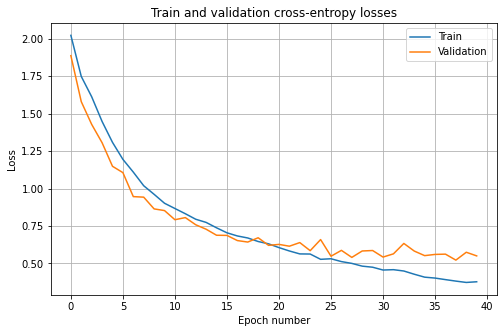

In [11]:
learning.plot_losses(train_losses=train_losses, valid_losses=valid_losses,
            fig_size_width=8, fig_size_height=5)

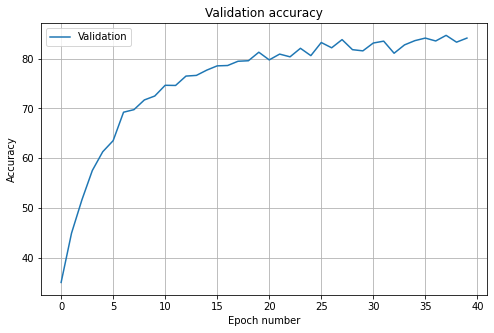

In [12]:
learning.plot_accuracy(validation_accuracy=validation_accuracy,
              fig_size_width=8, fig_size_height=5)

In [13]:
learning.predict_image(test_dataset[200][0])

TypeError: 'NoneType' object is not subscriptable